<a href="https://colab.research.google.com/github/chrispinheiro/tech-challenge/blob/main/techChalenge_fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tech Chalenge Fase I**

Projeto Pos em IA para DEVs
-Equipe 50

Participantes:

*   Ana Paula de Sa Lopes de Simone
*  Christiane Pinheiro Campelo da Silva
*  Leandro Juvenal Marques

         
              

Para esse trabalho treinamos base Insurance.csv.

Importamos a Biblioteca Panda para leitura do arquivo CSV.

In [1]:
import pandas as pd

Importado arquivo Insurance contendo 1.338 registros

Features: age, sex, bmi(IMC), children , smoker, region, charges(Encargos).

In [2]:
Seguro_saude= pd.read_csv('insurance.csv', encoding="latin1")

In [3]:
print(Seguro_saude.shape)

(1338, 7)


In [4]:
print(Seguro_saude.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Calculando estatísticas descritivas básicas

In [5]:
estatisticas_descritivas = Seguro_saude.describe()
print(estatisticas_descritivas)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


**GRAFICOS DE FREQUENCIA**
Importando biblioteca de geração dos graficos para analise dos dados.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Geracao de grafico de barra relacionando Idade com sua frequencia.

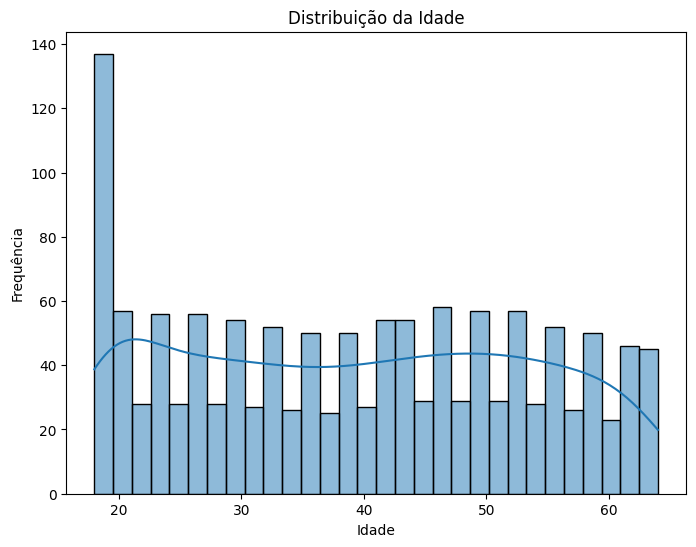

In [7]:
#distribuicao pela idade
plt.figure(figsize=(8, 6))
sns.histplot(Seguro_saude['age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Geracao de grafico de barra relacionando IMC com sua frequencia.

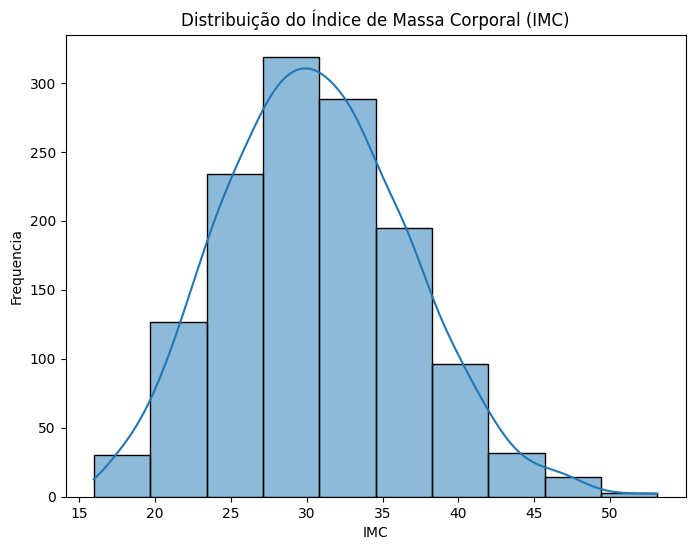

In [8]:
#distribuicao pelo IMC
plt.figure(figsize=(8, 6))
sns.histplot(Seguro_saude['bmi'], bins=10, kde=True)
plt.title('Distribuição do Índice de Massa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Frequencia')
plt.show()

Geracao de grafico de barra relacionando Numero de filhos com sua frequencia.

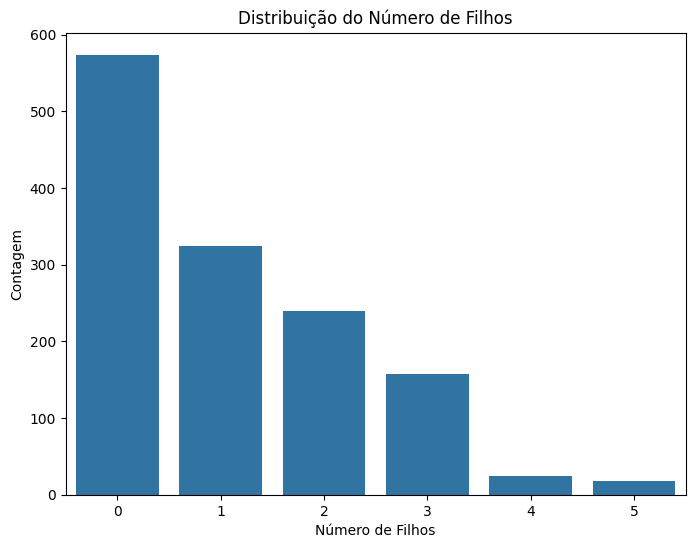

In [9]:
#Distribuicao pelo numero de filhos e quantidade dentro do arquivo csv
plt.figure(figsize=(8, 6))
sns.countplot(data=Seguro_saude, x='children')
plt.title('Distribuição do Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Contagem')
plt.show()

Geracao de grafico de barra relacionando Encargos Anuais com sua frequencia.

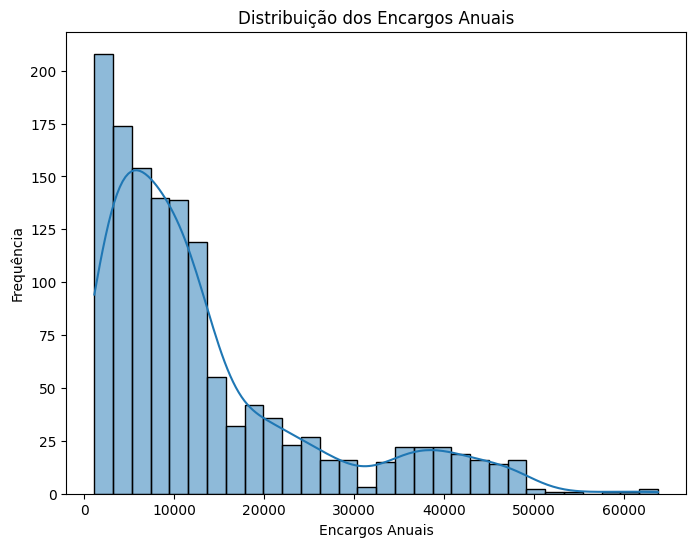

In [10]:
#Distribuicao pelos encargos anuais
plt.figure(figsize=(8, 6))
sns.histplot(Seguro_saude['charges'], bins=30, kde=True)
plt.title('Distribuição dos Encargos Anuais')
plt.xlabel('Encargos Anuais')
plt.ylabel('Frequência')
plt.show()


**GRAFICO DE DISPERSAO E HISTOGRAMA**

Grafico de distribuicao relacionando Valor dos Encargos Anuais com Idade do segurado.

In [11]:
import plotly.express as px
fig  = px.scatter(Seguro_saude, x = 'age', y = 'charges', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Encargos Seguro Saude')
fig.update_xaxes(title = 'Idade')
fig.update_yaxes(title = 'Encargos Anuais')
fig.show()

Geracao de grafico de barra relacionando IMC com sua frequencia.

Nessa parte do codigo geramos um histograma que é um gráfico da distribuição de dados. Ele é utilizado para mostrar a frequência de ocorrência desses dados em intervalos contínuos ou categorias.  

Para relacionarmos Idade x IMC x Encargos Anuais foram gerados graficos de dispersao.

Nessa analise entendemos que o grafico mais representativo para nos e o de dispersao entre IMC e os encargos, pois verificamos uma concentração de dados devido ao grande numero de pessoas jovens.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

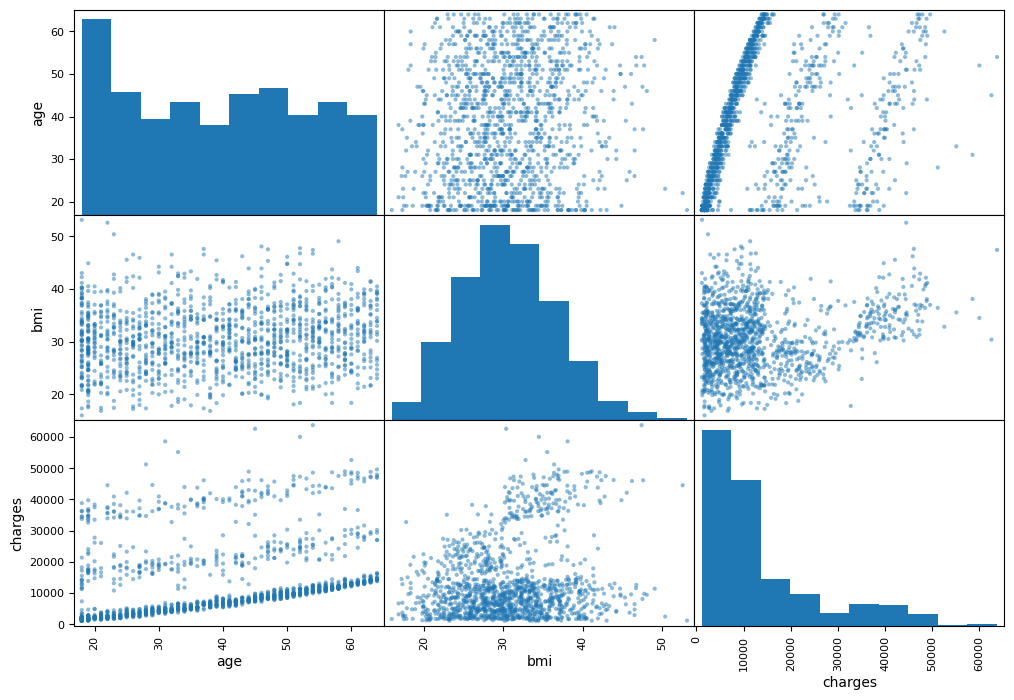

In [12]:
#histograma e grafico de dispersao
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "charges"]
scatter_matrix(Seguro_saude[attributes], figsize=(12, 8))

**LIMPEZA DA BASE**

Pela execução do codigo abaixo percebe-se a inexistencia de valores ausentes. Dessa forma, nao existe necessidade de executar os comandos abaixo:

# Tratando valores ausentes na coluna IMC com a média
Seguro_saude['bmi'].fillna(Seguro_saude['bmi'].mean(), inplace=True)
Seguro_saude.head()

# Preencher valores ausentes na coluna Encargos Anuais com a mediana
Seguro_saude['charges'].fillna(Seguro_saude['charges'].median(), inplace=True)
Seguro_saude.charges

# Remover linhas com valores ausentes em qualquer coluna
Seguro_saude.dropna(axis=0, how='any', inplace=True)



In [13]:
# Verificar se ainda existem valores ausentes
valores_ausentes_apos_tratamento = Seguro_saude.isnull().sum()
print(valores_ausentes_apos_tratamento)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No intuito de categorizar as features Sex, smoker e region usamos a biblioteca/classe: sklearn.preprocessing/LabelEncoder.

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Seguro_saude['smoker'] = label_encoder.fit_transform(Seguro_saude['smoker'])
print(Seguro_saude.head())


   age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0       1  southwest  16884.92400
1   18    male  33.770         1       0  southeast   1725.55230
2   28    male  33.000         3       0  southeast   4449.46200
3   33    male  22.705         0       0  northwest  21984.47061
4   32    male  28.880         0       0  northwest   3866.85520


In [15]:
Seguro_saude['sex'] = label_encoder.fit_transform(Seguro_saude['sex'])
print(Seguro_saude.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [16]:
Seguro_saude['region'] = label_encoder.fit_transform(Seguro_saude['region'])
print(Seguro_saude.head(10))

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5   31    0  25.740         0       0       2   3756.62160
6   46    0  33.440         1       0       2   8240.58960
7   37    0  27.740         3       0       1   7281.50560
8   37    1  29.830         2       0       0   6406.41070
9   60    0  25.840         0       0       1  28923.13692


Geração de estatistica resumidas, informações sobre o seguro saude e apresentação das primeiras linhas com algumas features categorizadas.

In [17]:
print(Seguro_saude.describe())  # Estatísticas resumidas
print(Seguro_saude.info())       # Informações sobre o DataFrame
print(Seguro_saude.head())       # Visualizar as primeiras linhas

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010  
<class 'pandas.cor

**MATRIZ DE CORRELACAO**

Abaixo apresentamos a correlação de encargos anuais(charges) com as demais features.

In [20]:
corr_matrix = Seguro_saude.corr()
corr_matrix["charges"].sort_values(ascending=False)


charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

Aqui importamos a classe train_test_split para iniciarmos o treino da base de Seguro Saude.
  
- Eixo X: todas as colunas exceto 'Encargos Anuais'
- Eixo Y: coluna 'Encargos Anuais'.


Separando os Encargos Anuais(target) das demais features

In [21]:
# Dividindo os dados em recursos (x) e rótulos (y)
x = Seguro_saude.drop(columns=['charges'],axis=1)
y = Seguro_saude['charges']

Padronizando as variaveis independentes.

In [22]:
from sklearn.preprocessing import StandardScaler
# Padronizando os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(x)

Exibindo todos os dados apos a padronizacao.

In [23]:
# Exibindo os dados padronizados
df_padronizado = pd.DataFrame(X_padronizado, columns=x.columns)
df_padronizado['charges'] = y  # Adicionando a coluna 'Encargos Anuais' de volta ao DataFrame
print(df_padronizado)

           age       sex       bmi  children    smoker    region      charges
0    -1.438764 -1.010519 -0.453320 -0.908614  1.970587  1.343905  16884.92400
1    -1.509965  0.989591  0.509621 -0.078767 -0.507463  0.438495   1725.55230
2    -0.797954  0.989591  0.383307  1.580926 -0.507463  0.438495   4449.46200
3    -0.441948  0.989591 -1.305531 -0.908614 -0.507463 -0.466915  21984.47061
4    -0.513149  0.989591 -0.292556 -0.908614 -0.507463 -0.466915   3866.85520
...        ...       ...       ...       ...       ...       ...          ...
1333  0.768473  0.989591  0.050297  1.580926 -0.507463 -0.466915  10600.54830
1334 -1.509965 -1.010519  0.206139 -0.908614 -0.507463 -1.372326   2205.98080
1335 -1.509965 -1.010519  1.014878 -0.908614 -0.507463  0.438495   1629.83350
1336 -1.296362 -1.010519 -0.797813 -0.908614 -0.507463  1.343905   2007.94500
1337  1.551686 -1.010519 -0.261388 -0.908614  1.970587 -0.466915  29141.36030

[1338 rows x 7 columns]


**Modelo de Regressao Linear Multipla**

Definindo as features juntamente com o intercepto para criar e ajustar modelo de regressao linear.

In [24]:
import statsmodels.api as sm
# Adicionar uma constante para o termo de intercepto
# Interceptor da linha de regressao (quando o valor previsto x=0)
df_padronizado['Intercepto'] = 1
# Definir as variáveis independentes (X)
X = df_padronizado[['age', 'sex', 'bmi','children','smoker','region','Intercepto']]
# Definir a variável dependente (Y)
Y = df_padronizado['charges']
# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()
# Imprimir os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        22:43:55   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age         3613.5362    166.932     21.647      0.0

Gerando matriz de correlacao. Ela e uma técnica de visualização de dados que mostra a magnitude de um fenômeno por meio de cor em duas dimensões. No grafico abaixo a maior correlacao existe entre a target e a feature smoker

<Axes: >

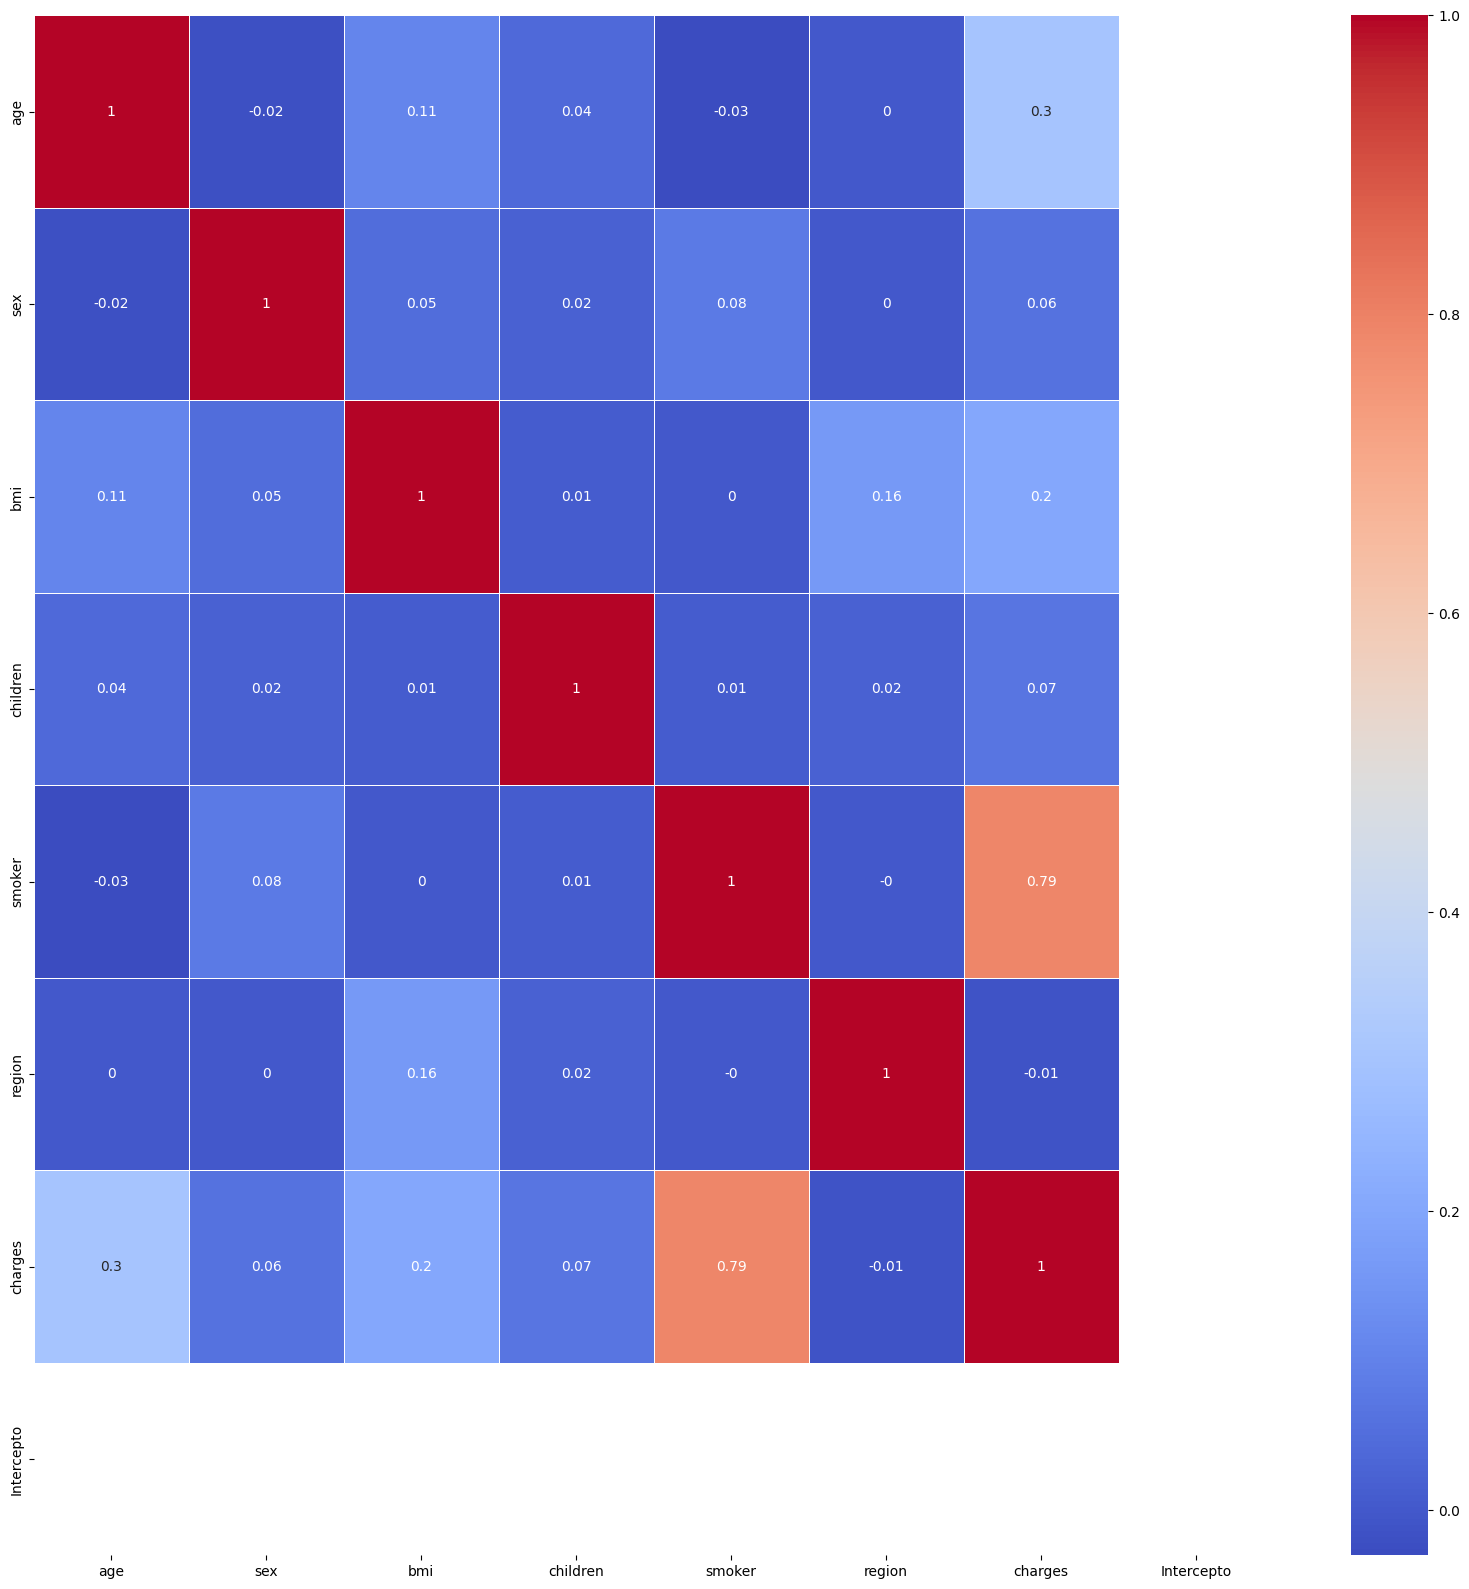

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df_padronizado.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Separando os dados das features e dos encargos anuais(target) apos a padronizacao.

In [26]:
from sklearn.model_selection import train_test_split
#separando os dados
x = df_padronizado.drop(columns=['charges'])
y = df_padronizado['charges']   #o que eu quero prever (target)

Dividindo a base entre treino e teste, e gerando a arvore de decisao a partir dos dados padronizados.

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth = 3)

Dividindo os valores da variável y_train e y_test em intervalos e atribuindo a cada valor uma categoria baseada nesses intervalos

In [28]:
#categorizando as classes
y_train_categorico = pd.cut(y_train, bins=5, labels=False)
y_test_categorico = pd.cut(y_test, bins=5, labels=False)
dt.fit(x_train, y_train_categorico)


DecisionTreeClassifier(max_depth=3, random_state=7)

Realizando a predicao em cima dos dados de teste e exibindo a arvore de decisao.

[Text(0.5, 0.875, 'x[4] <= 0.732\ngini = 0.492\nsamples = 1070\nvalue = [733, 183, 74, 74, 6]'),
 Text(0.25, 0.625, 'x[0] <= 1.516\ngini = 0.245\nsamples = 850\nvalue = [732, 94, 24, 0, 0]'),
 Text(0.125, 0.375, 'x[0] <= 1.374\ngini = 0.173\nsamples = 793\nvalue = [719, 54, 20, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.158\nsamples = 764\nvalue = [699, 48, 17, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.471\nsamples = 29\nvalue = [20, 6, 3, 0, 0]'),
 Text(0.375, 0.375, 'x[1] <= -0.01\ngini = 0.451\nsamples = 57\nvalue = [13, 40, 4, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.233\nsamples = 31\nvalue = [2, 27, 2, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.565\nsamples = 26\nvalue = [11, 13, 2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= -0.113\ngini = 0.671\nsamples = 220\nvalue = [1, 89, 50, 74, 6]'),
 Text(0.625, 0.375, 'x[0] <= 1.124\ngini = 0.264\nsamples = 105\nvalue = [1, 89, 14, 1, 0]'),
 Text(0.5625, 0.125, 'gini = 0.123\nsamples = 93\nvalue = [1, 87, 4, 1, 0]'),
 Text(0.6875, 0.125, 'gini = 0.278\

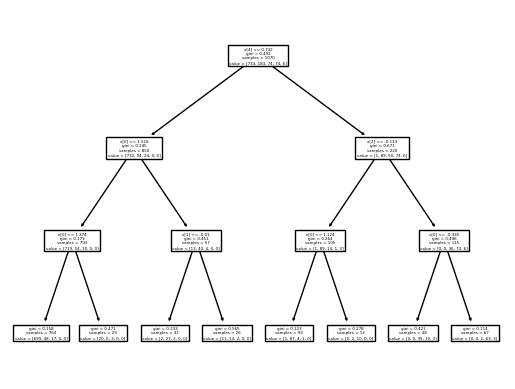

In [30]:
y_predito = dt.predict(x_test)

from sklearn.tree import plot_tree
from sklearn import tree

tree.plot_tree(dt)

Gerando a acuracia do modelo

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_categorico, y_predito)) #relatório de validação das métrica de desempenho.

0.8880597014925373


Gerando o smote nos dados para equilibrar as classes minoritarias.

In [32]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE para oversampling da classe minoritária
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train_categorico)


Exibindo o shape dos dados treinados.

In [33]:
x_train.shape

(1070, 7)

Exibindo o shape dos dados treinados após o smote.

In [34]:
x_train_os.shape

(3665, 7)

Gerando o  modelo Random forest (arvore de decisao)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'entropy', n_estimators=80, max_depth = 7, class_weight = 'balanced', random_state=7)

rf.fit(x_train_os, y_train_os)
estimator_rf = rf.estimators_


y_predito_random_forest = rf.predict(x_test)


Gerando acuracia em cima da base de teste categorizada.




In [36]:
#categorizando as classes

print(accuracy_score(y_test_categorico, y_predito_random_forest))

0.8805970149253731


Printando os scores da base de treino e de teste.

In [37]:
y_test_binned = pd.cut(y_test, bins=5, labels=False)
print (rf.score(x_train, y_train_categorico))
print(rf.score(x_test, y_test_binned))

0.9242990654205607
0.8805970149253731
